In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import seaborn as sns
import speech_emotion as ser

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Activation, Dropout, MaxPooling1D, Flatten, Dense, BatchNormalization

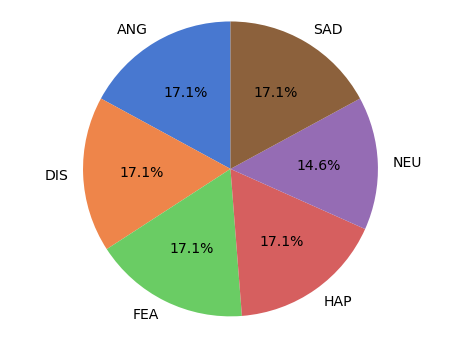

In [3]:
# data visualization
ser.displaydatapie()

In [4]:
# load data
data = "AudioWAV/"

data_df, emotion_df = ser.load_data(data)

      label                          path
0         0  AudioWAV/1001_DFA_ANG_XX.wav
1         1  AudioWAV/1001_DFA_DIS_XX.wav
2         2  AudioWAV/1001_DFA_FEA_XX.wav
3         3  AudioWAV/1001_DFA_HAP_XX.wav
4         4  AudioWAV/1001_DFA_NEU_XX.wav
...     ...                           ...
7437      1  AudioWAV/1091_WSI_DIS_XX.wav
7438      2  AudioWAV/1091_WSI_FEA_XX.wav
7439      3  AudioWAV/1091_WSI_HAP_XX.wav
7440      4  AudioWAV/1091_WSI_NEU_XX.wav
7441      5  AudioWAV/1091_WSI_SAD_XX.wav

[7442 rows x 2 columns]
      label
0         0
1         1
2         2
3         3
4         4
...     ...
7437      1
7438      2
7439      3
7440      4
7441      5

[7442 rows x 1 columns]


In [5]:
# all features (first option) had highest accuracy

df = ser.extract_features(data_df, contrast=True, chroma=True, mfcc=True, rms=True, mel=True)
#df = ser.extract_features(data_df, chroma=True, mfcc=True, mel=True)
#df = ser.extract_features(data_df, contrast=True, chroma=True, mfcc=True, rms=True)
#df = ser.extract_features(data_df, contrast=True, chroma=True, mel=True)
#df = ser.extract_features(data_df, contrast=True, chroma=True, rms=True)
print(df)

C:\Users\ahris\miniconda3\envs\env8\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


            0          1          2          3          4          5    \
0     22.002622  15.386446  18.846731  16.960540  19.038135  18.399464   
1     19.848460  14.237836  17.875207  15.871108  17.862471  17.399194   
2     21.570514  14.974913  18.369854  16.206723  18.569050  17.083304   
3     21.157698  16.798375  18.089729  15.914725  19.340829  17.884558   
4     19.830533  14.517372  17.898066  16.243591  18.553866  18.304708   
...         ...        ...        ...        ...        ...        ...   
7437  16.940940  15.604042  16.859897  16.838104  17.082393  16.849975   
7438  18.439287  16.671778  17.527486  15.800361  17.059067  16.519365   
7439  18.036643  16.275475  18.176777  16.736053  17.067760  17.301670   
7440  16.437263  15.151761  17.839488  17.293376  17.078778  17.073937   
7441  16.505109  14.933378  16.805214  17.322597  17.362558  16.643943   

            6         7         8         9    ...       158       159  \
0     14.794443  0.661535  0.698241  

In [6]:
x_train, x_test, y_train, y_test = ser.tts_adjust(df, emotion_df)
print(x_train)
print(x_train.shape)

# scaling data with sklearn's RobustScaler
#scaler = RobustScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#print(x_train_scaled)

[[[1.53322280e+01]
  [1.63396928e+01]
  [1.78916224e+01]
  ...
  [7.11725093e-03]
  [8.56900588e-03]
  [1.36274481e-02]]

 [[1.61719240e+01]
  [1.49184327e+01]
  [1.83252939e+01]
  ...
  [1.60448399e-04]
  [1.20777164e-04]
  [1.51830871e-04]]

 [[1.36423343e+01]
  [1.46486663e+01]
  [1.69422223e+01]
  ...
  [7.80899310e-04]
  [5.63898298e-04]
  [5.45613875e-04]]

 ...

 [[1.76874132e+01]
  [1.65052025e+01]
  [2.02256685e+01]
  ...
  [1.36210872e-02]
  [1.00795114e-02]
  [1.04638580e-02]]

 [[1.93271505e+01]
  [1.55533316e+01]
  [1.76559037e+01]
  ...
  [9.87999048e-03]
  [1.25604598e-02]
  [1.48832593e-02]]

 [[2.14459685e+01]
  [1.59166138e+01]
  [1.68838851e+01]
  ...
  [1.71206263e-03]
  [1.26386737e-03]
  [1.45637325e-03]]]
(5953, 168, 1)


In [7]:
# 17 Layer Model
model = Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 168, 256)          2304      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 84, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 256)           327936    
_________________________________________________________________
activation (Activation)      (None, 84, 256)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 42, 128)           163968    
_________________________________________________________________
activation_1 (Activation)    (None, 42, 128)           0

In [8]:
# 7 Layer Model
"""model = Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())"""

"model = Sequential()\nmodel.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1], 1)))\nmodel.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))\n\nmodel.add(Flatten())\nmodel.add(Dense(units=64))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.3))\n\nmodel.add(Dense(units=64, activation='sigmoid'))\nopt = keras.optimizers.Adam(lr=0.0001)\nmodel.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])\nprint(model.summary())"

In [9]:
cnnhistory = model.fit(x_train, y_train, epochs=90, validation_data=(x_test, y_test), verbose=0)
print("Accuracy of our model on test data : ", model.evaluate(x_test,y_test)[1]*100 , "%")

# score = model.evaluate(x_test, y_test, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

47/47 [==============================] - 0s 8ms/step - loss: 1.3274 - accuracy: 0.4909
Accuracy of our model on test data :  49.093350768089294 %


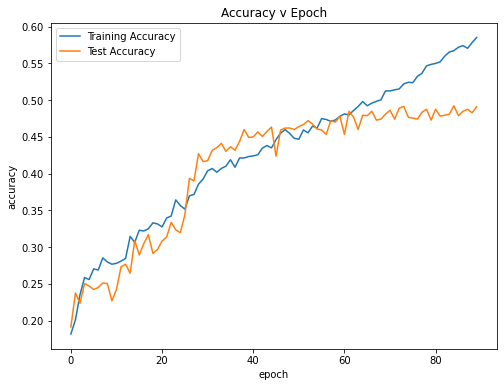

In [10]:
# display graph that shows accuracy over epoch iteration
ser.displayplot_acc(cnnhistory, 'Accuracy v Epoch')